<a href="https://colab.research.google.com/github/SaiGouthamGoli/GRIP-TSF-Data-Science-Business-Analytics-Tasks-/blob/main/GRIP_TSF_Data_Science_%26_Business_Analytics_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation (GRIP)**

## **Data Science & Business Analytics Intern**
## **Task: Prediction using Supervised ML(1)**

### **Author : Sai Goutham Goli**

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

## Data Visualization

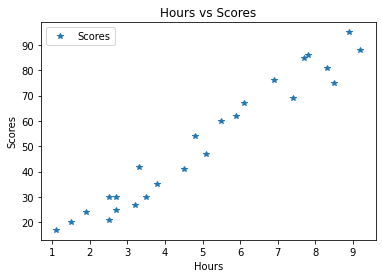

In [6]:
df.plot(x="Hours",y="Scores",style = "o", marker = "*")
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

## **Train and Test Data**

In [7]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,:-1]
Y=df.iloc[:,1:]
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=4)

In [8]:
test_x.shape

(4, 1)

## **Training the model**

### **Linear Regression**

In [9]:
from sklearn.linear_model import LinearRegression  

Linear_Reg = LinearRegression()

In [10]:
Linear_Reg.fit(train_x,train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

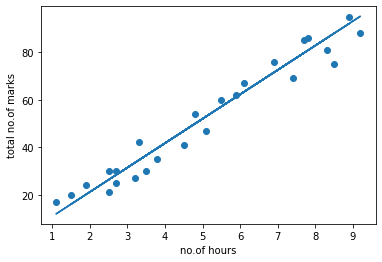

In [11]:
#plotting the scatter plot
line = Linear_Reg.coef_*X+Linear_Reg.intercept_

plt.scatter(X,Y)
plt.plot(X,line)
plt.xlabel("no.of hours")
plt.ylabel("total no.of marks")
plt.show()

In [12]:
y_pred = Linear_Reg.predict(test_x)

In [13]:
data = pd.DataFrame({'Original Score':test_y.values.reshape(-1,),'Predicted Score':y_pred.reshape(-1,)})
data.head()

,Original Score,Predicted Score
0,24,20.139374
1,88,95.141659
2,81,85.894802
3,69,76.647945


In [14]:
#metric for model evaluation
from sklearn.metrics import mean_absolute_error

lr_mae = mean_absolute_error(y_pred,test_y)
print(lr_mae) 

5.886258157440847


### **Logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression
Logistic_Reg = LogisticRegression(max_iter=500)
Logistic_Reg.fit(train_x,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_predict1 = Logistic_Reg.predict(test_x)

In [17]:
data1 = pd.DataFrame({'Original Score':test_y.values.reshape(-1,),'Predicted Score':y_pred.reshape(-1,)})
data1.head()

,Original Score,Predicted Score
0,24,20.139374
1,88,95.141659
2,81,85.894802
3,69,76.647945


In [18]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(test_y,y_predict1))

Mean Absolute Error: 8.25


## **Conclusion**

Based on evaluation metrics, we can conclude that Linear Regression model performs best in this case

In [19]:
print("Predicted score for 9.25 hours studying is %.3f"%Linear_Reg.predict([[9.25]])[0])

Predicted score for 9.25 hours studying is 95.655
